# Overfitting and regularization

<http://neuralnetworksanddeeplearning.com/chap3.html#overfitting_and_regularization>

Math background Section 5.2 of <http://www.deeplearningbook.org/contents/ml.html> 


Underfitting occurs when the model is not able to obtain a sufficiently low error value on the training set. 

Overfitting occurs when the gap between the training error and test error is too large.


## Regression

Overfitting example in <http://neuralnetworksanddeeplearning.com/chap3.html#why_does_regularization_help_reduce_overfitting>


Suppose we have a simple data set of 9 points for which we wish to build a model
- we can find a unique 9th-order polynomial $y = a_0 x^9 + a_1 x^8 + \ldots + a_9$ which fits the data exactly.
-  we can also get a good fit using the linear model $y = 2x$

Suppose we want to predict the value of y corresponding to some large value of x, much larger than any data points there will be a dramatic difference between the predictions of the two models, as the 9th order polynomial model comes to be dominated by the x9 term, while the linear model remains linear. The 9th order model has is really just learning the effects of local noise and this brings huge error in prediction.

And so while the 9th order model works perfectly for these particular data points, the model will fail to generalize to other data points, and the noisy linear model will have greater predictive power.



# Neural network

## Experiment 1:

- use 1000 images to train to highlight network training behaviors
- set num_epochs = 400 batch_size = 10 learning = 0.5
- plot cost and accuracy for training and test data
- Results: in the "accuracy on test data" plot the learning gradually slows down and, at around epoch 150 (may change) the classification accuracy pretty much stops improving. We say the network is overfitting or overtraining beyond epoch 150 (may change). Same phenomenon shows up if we compare cost or classification accuracy on training and test data

## Experiment 2:

- use all training set of 50000 images
- 30 epochs 
- Result: the accuracy on the test and training data remain much closer together than when we were using 1,000 training. Overfitting is still going on, but it's been greatly reduced. The network is generalizing much better from the training data to the test data. **In general, one of the best ways of reducing overfitting is to increase the size of the training data.**


# Dataset

Dataset have two main groups:

- training data
- test data

Training data can be split in two groups:

- training reduced data
- validation data

Strategy is to:

- train network with training reduced dataset
- test/validate different hyper-parameters on validation data (see how the network generalize)
- finally test the network on test data

when setting hyper-parameters we're likely to try many different choices for the hyper-parameters
validation data is a type of training data that helps us learn good hyper-parameters


In [1]:
# Reset and load python functions
%reset
%run python/download_data.py
%run python/mnist_loader.py
%run python/network2.py
%run python/overfitting.py

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [4]:
# Experiment 1 (see note above)

training_data, validation_data, test_data = load_data_wrapper()
net = Network([784, 30, 10], cost=CrossEntropyCost)
net.large_weight_initializer()
# Hyper-parameters:
num_epochs_1 = 400
batch_size_1 = 10
learning_1 = 0.5
lmbda_1 = 0.0
training_set_size = 1000
data,label = zip(*training_data)
training_data_1000 = zip(data[:training_set_size],label[:training_set_size])
#test_cost, test_accuracy, training_cost, training_accuracy = net.SGD(training_data_1000, epochs, batch_size, learning, evaluation_data=test_data, monitor_evaluation_accuracy=True, monitor_training_cost=True)
test_cost_1, test_accuracy_1, training_cost_1, training_accuracy_1 = net.SGD(
    training_data_1000, num_epochs_1, batch_size_1, learning_1,
    evaluation_data=test_data, lmbda = lmbda_1,
    monitor_evaluation_cost=True, 
    monitor_evaluation_accuracy=True, 
    monitor_training_cost=True, 
    monitor_training_accuracy=True)
# Store data to file
f = open("data/overfitting_1.json", "w")
json.dump([test_cost_1, test_accuracy_1, training_cost_1, training_accuracy_1], f)
f.close()

Epoch 0 training complete
Cost on training data: 1.8097591384934537
Accuracy on training data: 679 / 1000
Cost on evaluation data: 2.211385774375981
Accuracy on evaluation data: 5774 / 10000
Epoch 1 training complete
Cost on training data: 1.3273019909359762
Accuracy on training data: 786 / 1000
Cost on evaluation data: 1.7593047717355836
Accuracy on evaluation data: 6773 / 10000
Epoch 2 training complete
Cost on training data: 1.1721338317528454
Accuracy on training data: 815 / 1000
Cost on evaluation data: 1.6440820905630673
Accuracy on evaluation data: 7026 / 10000
Epoch 3 training complete
Cost on training data: 0.9267067871365828
Accuracy on training data: 873 / 1000
Cost on evaluation data: 1.4891565007351562
Accuracy on evaluation data: 7419 / 10000
Epoch 4 training complete
Cost on training data: 0.793926306565777
Accuracy on training data: 902 / 1000
Cost on evaluation data: 1.4207665005299392
Accuracy on evaluation data: 7543 / 10000
Epoch 5 training complete
Cost on training

Cost on evaluation data: 1.3711920206342105
Accuracy on evaluation data: 8149 / 10000
Epoch 43 training complete
Cost on training data: 0.06795590153179806
Accuracy on training data: 996 / 1000
Cost on evaluation data: 1.3686534405753243
Accuracy on evaluation data: 8159 / 10000
Epoch 44 training complete
Cost on training data: 0.06589538223658502
Accuracy on training data: 997 / 1000
Cost on evaluation data: 1.3763495439443156
Accuracy on evaluation data: 8154 / 10000
Epoch 45 training complete
Cost on training data: 0.06383631703395719
Accuracy on training data: 997 / 1000
Cost on evaluation data: 1.3809102798783364
Accuracy on evaluation data: 8146 / 10000
Epoch 46 training complete
Cost on training data: 0.06235655043891759
Accuracy on training data: 998 / 1000
Cost on evaluation data: 1.3781105803813367
Accuracy on evaluation data: 8154 / 10000
Epoch 47 training complete
Cost on training data: 0.06021777024439264
Accuracy on training data: 999 / 1000
Cost on evaluation data: 1.382

Accuracy on evaluation data: 8171 / 10000
Epoch 85 training complete
Cost on training data: 0.027565054979167183
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.4926002878616518
Accuracy on evaluation data: 8176 / 10000
Epoch 86 training complete
Cost on training data: 0.027112005020306196
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.4961403677514737
Accuracy on evaluation data: 8175 / 10000
Epoch 87 training complete
Cost on training data: 0.0266026875833913
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.5001105300113677
Accuracy on evaluation data: 8177 / 10000
Epoch 88 training complete
Cost on training data: 0.026275160593234204
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.5046487360897658
Accuracy on evaluation data: 8167 / 10000
Epoch 89 training complete
Cost on training data: 0.025921298111174683
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.5054843164716076
Accuracy on evaluation

Accuracy on evaluation data: 8183 / 10000
Epoch 127 training complete
Cost on training data: 0.01609812300091359
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.5810641824600944
Accuracy on evaluation data: 8198 / 10000
Epoch 128 training complete
Cost on training data: 0.015865543048586846
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.5840662566129269
Accuracy on evaluation data: 8180 / 10000
Epoch 129 training complete
Cost on training data: 0.015693225728596924
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.5868343292346092
Accuracy on evaluation data: 8186 / 10000
Epoch 130 training complete
Cost on training data: 0.015532497008082867
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.5882597690590814
Accuracy on evaluation data: 8182 / 10000
Epoch 131 training complete
Cost on training data: 0.01534975997667825
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.5895072880194108
Accuracy on evalu

Cost on evaluation data: 1.6431814641779612
Accuracy on evaluation data: 8190 / 10000
Epoch 169 training complete
Cost on training data: 0.010929389101554499
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.6431949494663187
Accuracy on evaluation data: 8181 / 10000
Epoch 170 training complete
Cost on training data: 0.010853476895837976
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.6463323291799281
Accuracy on evaluation data: 8182 / 10000
Epoch 171 training complete
Cost on training data: 0.010764978663943143
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.6459723119894847
Accuracy on evaluation data: 8182 / 10000
Epoch 172 training complete
Cost on training data: 0.010696324889508882
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.6464021003670404
Accuracy on evaluation data: 8181 / 10000
Epoch 173 training complete
Cost on training data: 0.010610852962846836
Accuracy on training data: 1000 / 1000
Cost on evaluat

Cost on evaluation data: 1.6881128820285285
Accuracy on evaluation data: 8201 / 10000
Epoch 211 training complete
Cost on training data: 0.008208787825945758
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.6886433876807978
Accuracy on evaluation data: 8197 / 10000
Epoch 212 training complete
Cost on training data: 0.008159366855182239
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.689669892192359
Accuracy on evaluation data: 8198 / 10000
Epoch 213 training complete
Cost on training data: 0.008111849821921365
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.690380205711435
Accuracy on evaluation data: 8197 / 10000
Epoch 214 training complete
Cost on training data: 0.008065190303822144
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.691487765600144
Accuracy on evaluation data: 8199 / 10000
Epoch 215 training complete
Cost on training data: 0.00801836338759518
Accuracy on training data: 1000 / 1000
Cost on evaluation 

Cost on evaluation data: 1.7247802194024784
Accuracy on evaluation data: 8199 / 10000
Epoch 253 training complete
Cost on training data: 0.006573634518647444
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.7260668121345548
Accuracy on evaluation data: 8198 / 10000
Epoch 254 training complete
Cost on training data: 0.006540960022252097
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.7262236183871877
Accuracy on evaluation data: 8201 / 10000
Epoch 255 training complete
Cost on training data: 0.006507711477551988
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.7271577529825592
Accuracy on evaluation data: 8198 / 10000
Epoch 256 training complete
Cost on training data: 0.006477136986001069
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.7283312191997047
Accuracy on evaluation data: 8201 / 10000
Epoch 257 training complete
Cost on training data: 0.006446725772433867
Accuracy on training data: 1000 / 1000
Cost on evaluat

Cost on evaluation data: 1.7586283371112466
Accuracy on evaluation data: 8199 / 10000
Epoch 295 training complete
Cost on training data: 0.005437200544694919
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.7598199506893213
Accuracy on evaluation data: 8202 / 10000
Epoch 296 training complete
Cost on training data: 0.005414420099200581
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.7608093453506348
Accuracy on evaluation data: 8201 / 10000
Epoch 297 training complete
Cost on training data: 0.005391870855432985
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.7613663578062544
Accuracy on evaluation data: 8200 / 10000
Epoch 298 training complete
Cost on training data: 0.005369337121001842
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.762580870780746
Accuracy on evaluation data: 8201 / 10000
Epoch 299 training complete
Cost on training data: 0.005346873302468617
Accuracy on training data: 1000 / 1000
Cost on evaluati

Cost on evaluation data: 1.7873423959772237
Accuracy on evaluation data: 8211 / 10000
Epoch 337 training complete
Cost on training data: 0.004614554959884792
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.7880604468554715
Accuracy on evaluation data: 8211 / 10000
Epoch 338 training complete
Cost on training data: 0.004597931197259529
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.788555285349381
Accuracy on evaluation data: 8210 / 10000
Epoch 339 training complete
Cost on training data: 0.004581537048299897
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.7891414921993374
Accuracy on evaluation data: 8210 / 10000
Epoch 340 training complete
Cost on training data: 0.00456507508257261
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.7898923632610975
Accuracy on evaluation data: 8211 / 10000
Epoch 341 training complete
Cost on training data: 0.004548872500079504
Accuracy on training data: 1000 / 1000
Cost on evaluatio

Cost on evaluation data: 1.8106574525045256
Accuracy on evaluation data: 8220 / 10000
Epoch 379 training complete
Cost on training data: 0.004004832191017086
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.8113861203472772
Accuracy on evaluation data: 8220 / 10000
Epoch 380 training complete
Cost on training data: 0.003992316306833477
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.8117485703482419
Accuracy on evaluation data: 8219 / 10000
Epoch 381 training complete
Cost on training data: 0.003979491996679594
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.8125572463251873
Accuracy on evaluation data: 8221 / 10000
Epoch 382 training complete
Cost on training data: 0.003967127948916408
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1.8132370985676758
Accuracy on evaluation data: 8220 / 10000
Epoch 383 training complete
Cost on training data: 0.00395469901840414
Accuracy on training data: 1000 / 1000
Cost on evaluati

<IPython.core.display.Javascript object>


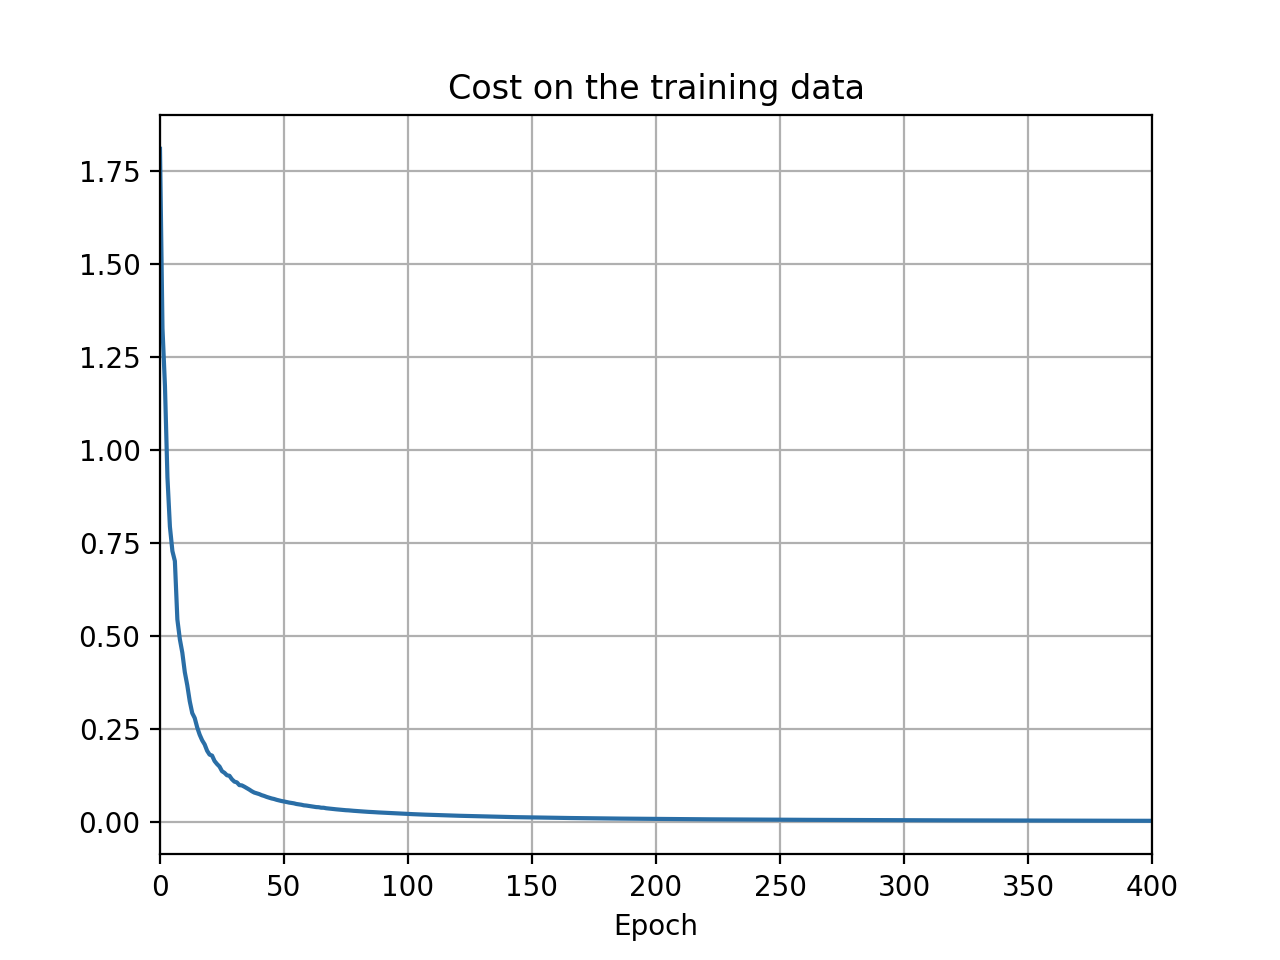

<IPython.core.display.Javascript object>


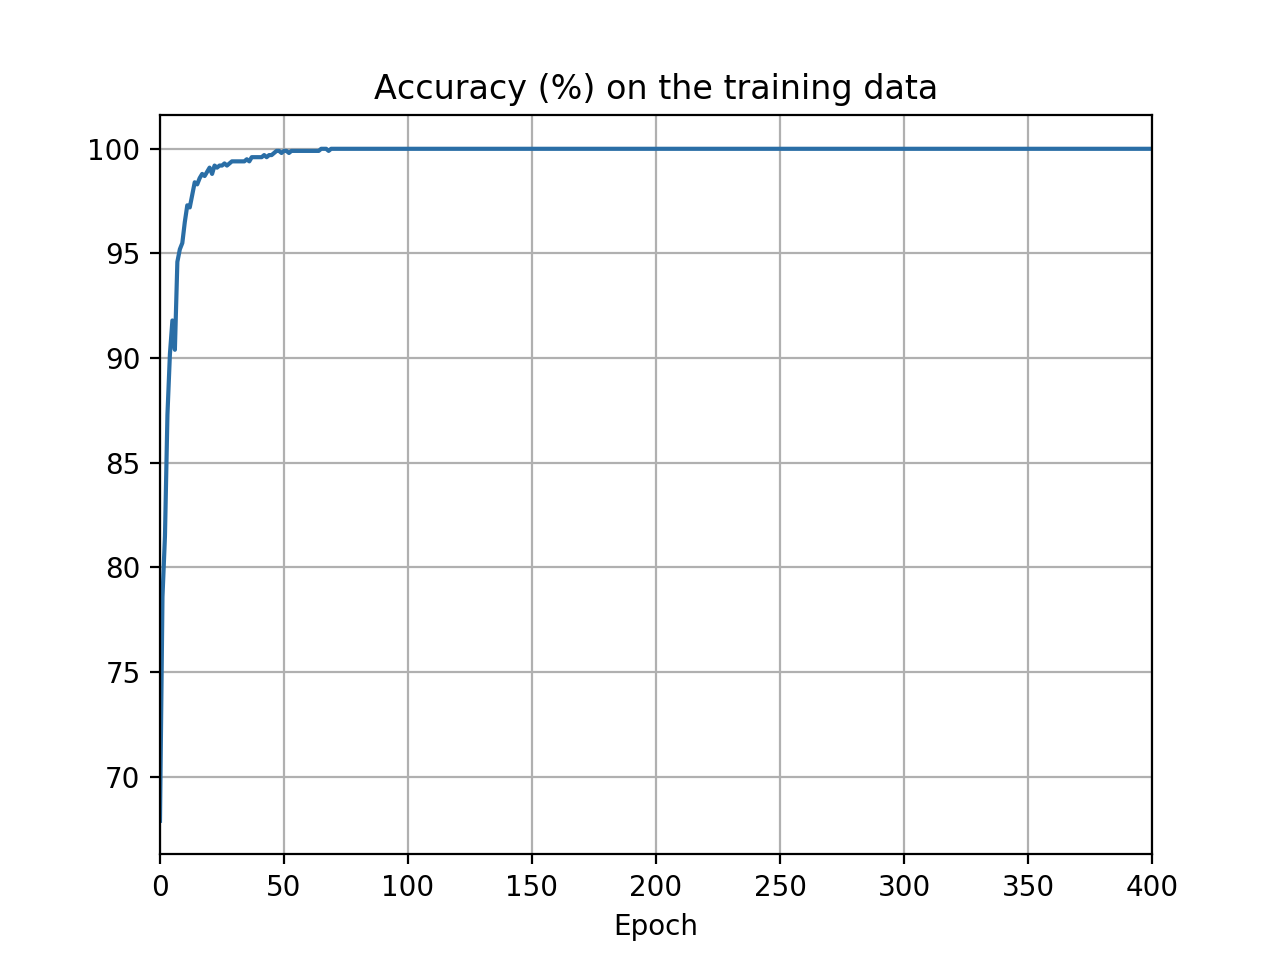

<IPython.core.display.Javascript object>


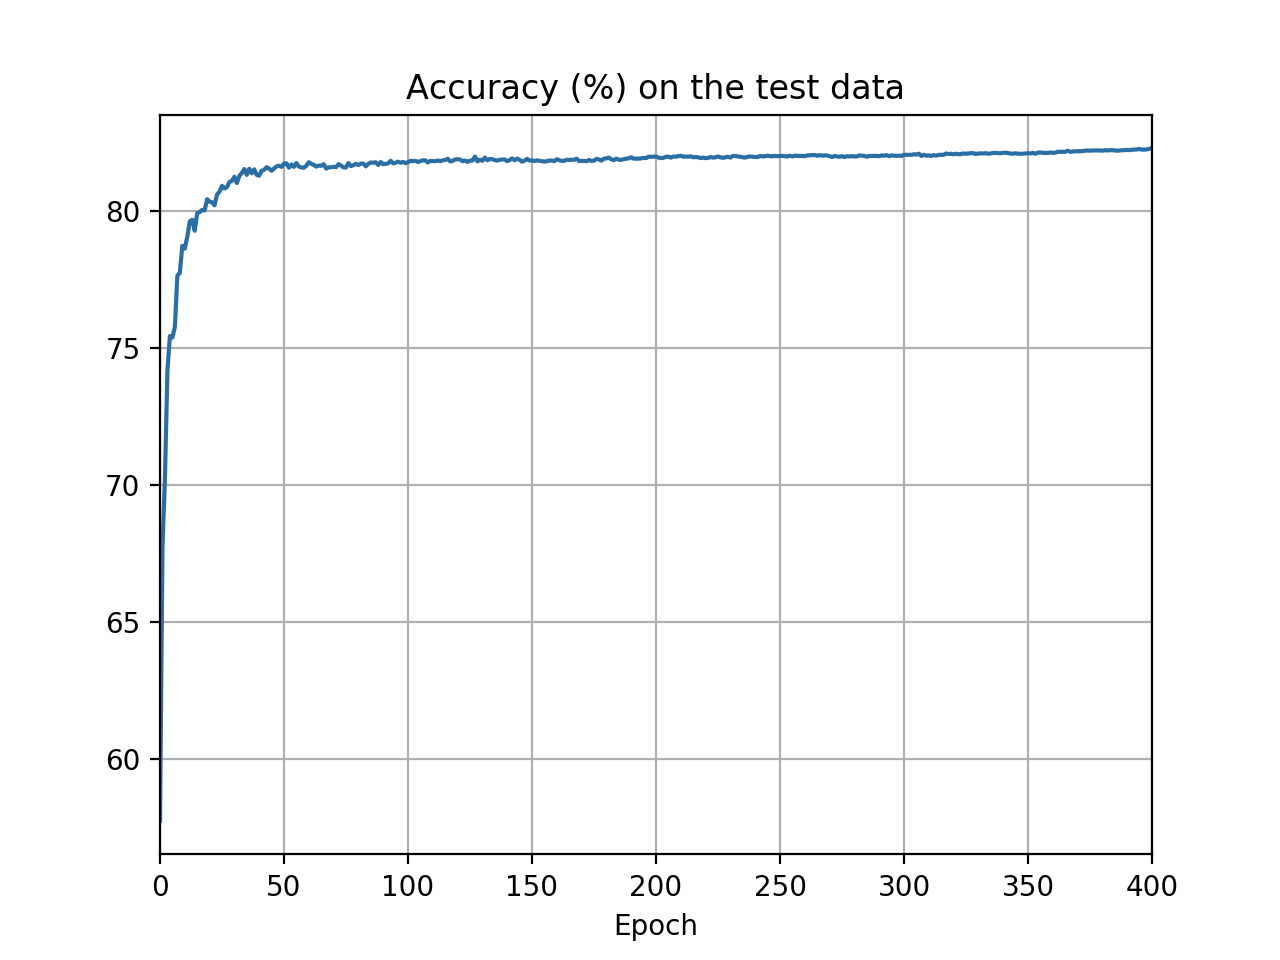

<IPython.core.display.Javascript object>


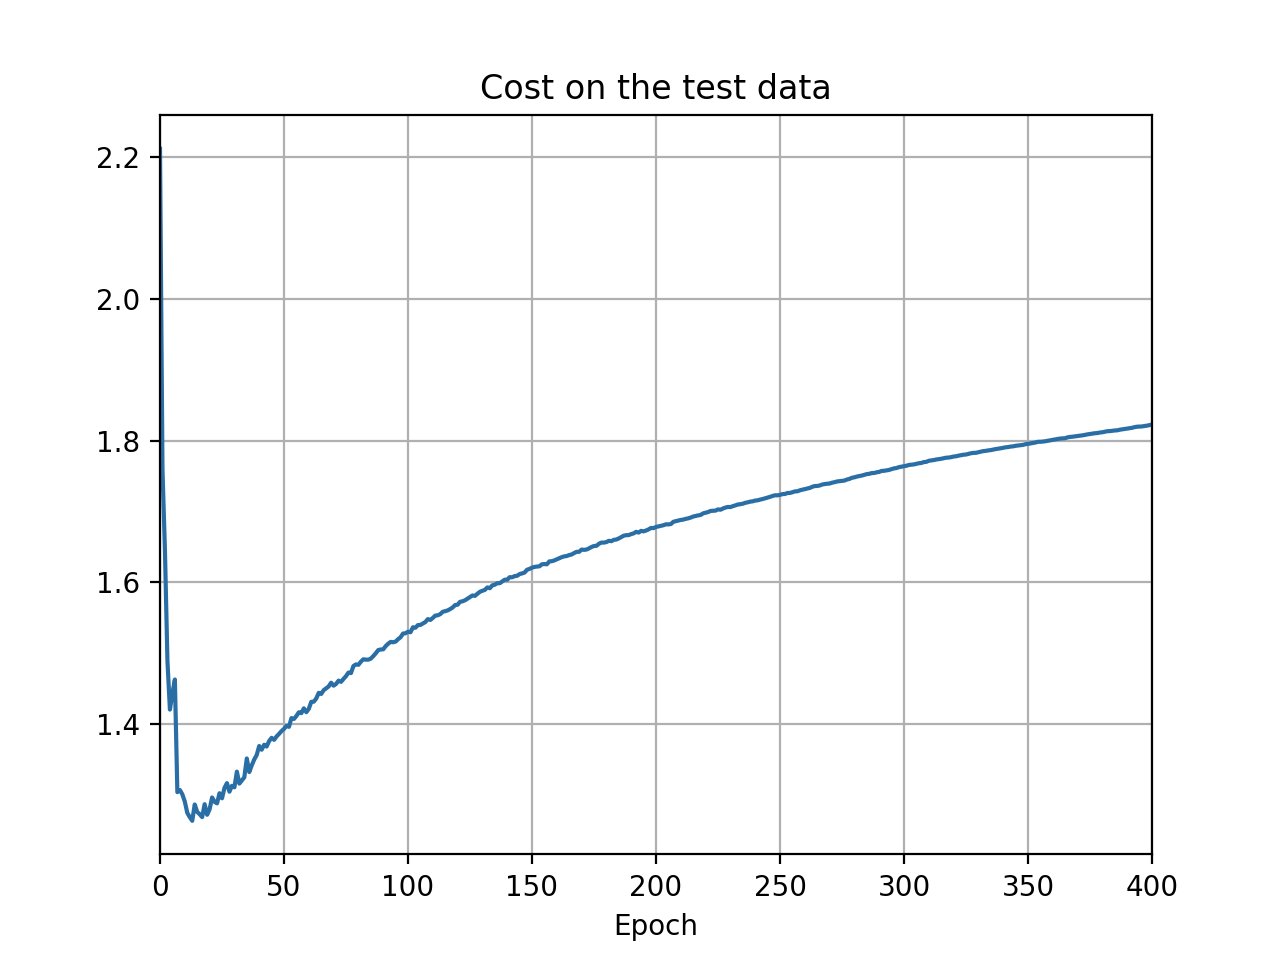

In [5]:
%matplotlib notebook
training_cost_xmin = 0
plot_training_cost(training_cost_1, num_epochs_1, training_cost_xmin)

training_accuracy_xmin = 0
plot_training_accuracy(training_accuracy_1, num_epochs_1, training_accuracy_xmin, training_set_size)

test_accuracy_xmin = 0
plot_test_accuracy(test_accuracy_1, num_epochs_1, test_accuracy_xmin)

test_cost_xmin = 0
plot_test_cost(test_cost_1, num_epochs_1, test_cost_xmin)


In [43]:
# Experiment 2 (see note above)

training_data, validation_data, test_data = load_data_wrapper()
net = Network([784, 30, 10], cost=CrossEntropyCost)
net.large_weight_initializer()
# Hyper-parameters:
num_epochs_2 = 30
batch_size_2 = 10
learning_2 = 0.5
lmbda_2 = 0.0
test_cost_2, test_accuracy_2, training_cost_2, training_accuracy_2 = net.SGD(
    training_data, num_epochs_2, batch_size_2, learning_2,
    evaluation_data=test_data, lmbda = lmbda_2,
    monitor_evaluation_cost=True, 
    monitor_evaluation_accuracy=True, 
    monitor_training_cost=True, 
    monitor_training_accuracy=True)
# Store data to file
f = open("data/overfitting_2.json", "w")
json.dump([test_cost_2, test_accuracy_2, training_cost_2, training_accuracy_2], f)
f.close()

Epoch 0 training complete
Cost on training data: 0.5563220642179834
Accuracy on training data: 45795 / 50000
Cost on evaluation data: 0.5709395088716738
Accuracy on evaluation data: 9150 / 10000
Epoch 1 training complete
Cost on training data: 0.4424453590556936
Accuracy on training data: 46614 / 50000
Cost on evaluation data: 0.4684377780493803
Accuracy on evaluation data: 9278 / 10000
Epoch 2 training complete
Cost on training data: 0.42630220190562856
Accuracy on training data: 46796 / 50000
Cost on evaluation data: 0.48499723606770756
Accuracy on evaluation data: 9273 / 10000
Epoch 3 training complete
Cost on training data: 0.38363592330436896
Accuracy on training data: 47157 / 50000
Cost on evaluation data: 0.4429033600368216
Accuracy on evaluation data: 9341 / 10000
Epoch 4 training complete
Cost on training data: 0.3332514983028413
Accuracy on training data: 47596 / 50000
Cost on evaluation data: 0.40176908322297733
Accuracy on evaluation data: 9426 / 10000
Epoch 5 training comp

<IPython.core.display.Javascript object>


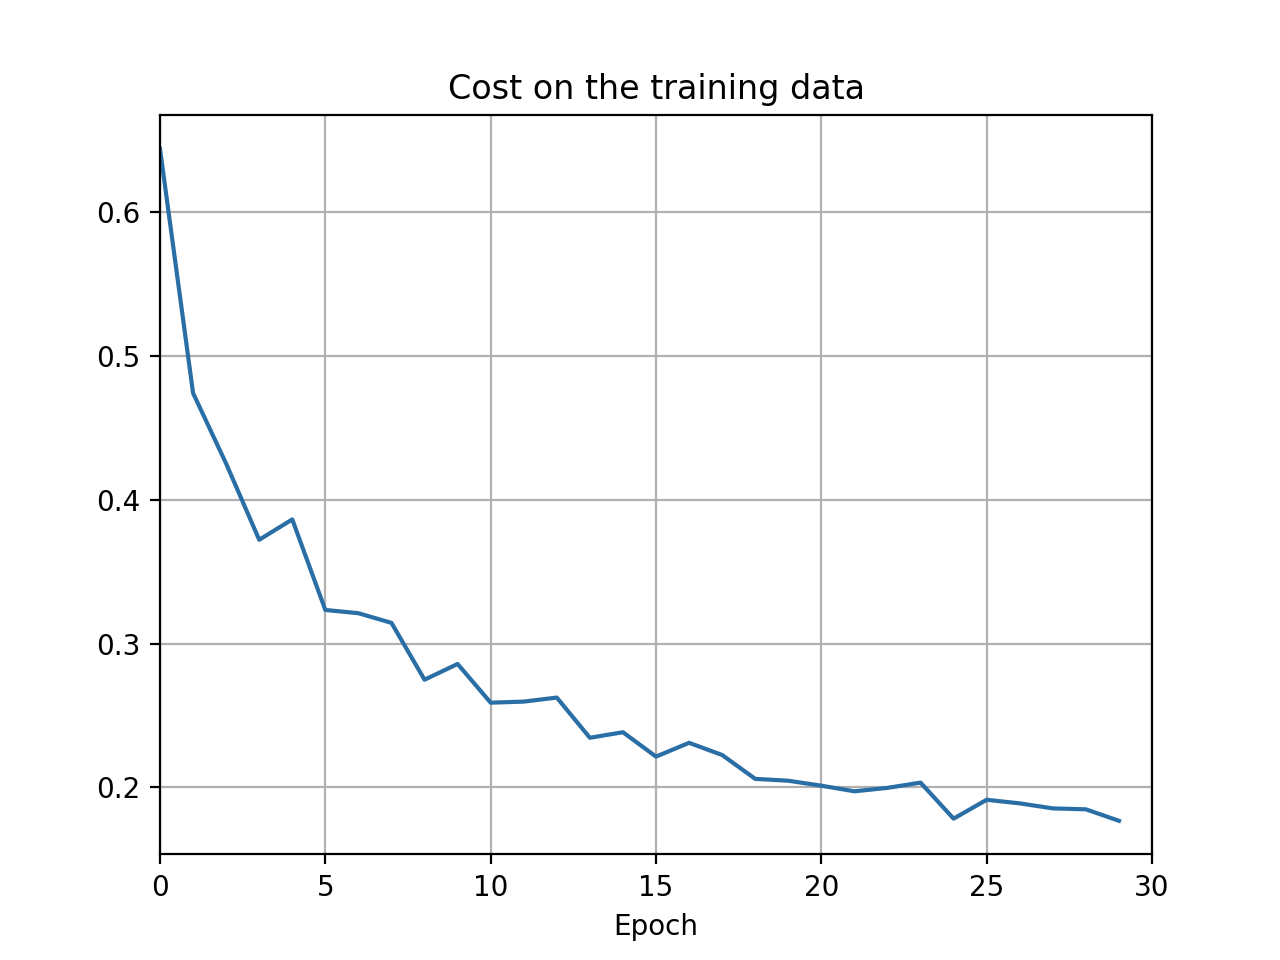

<IPython.core.display.Javascript object>


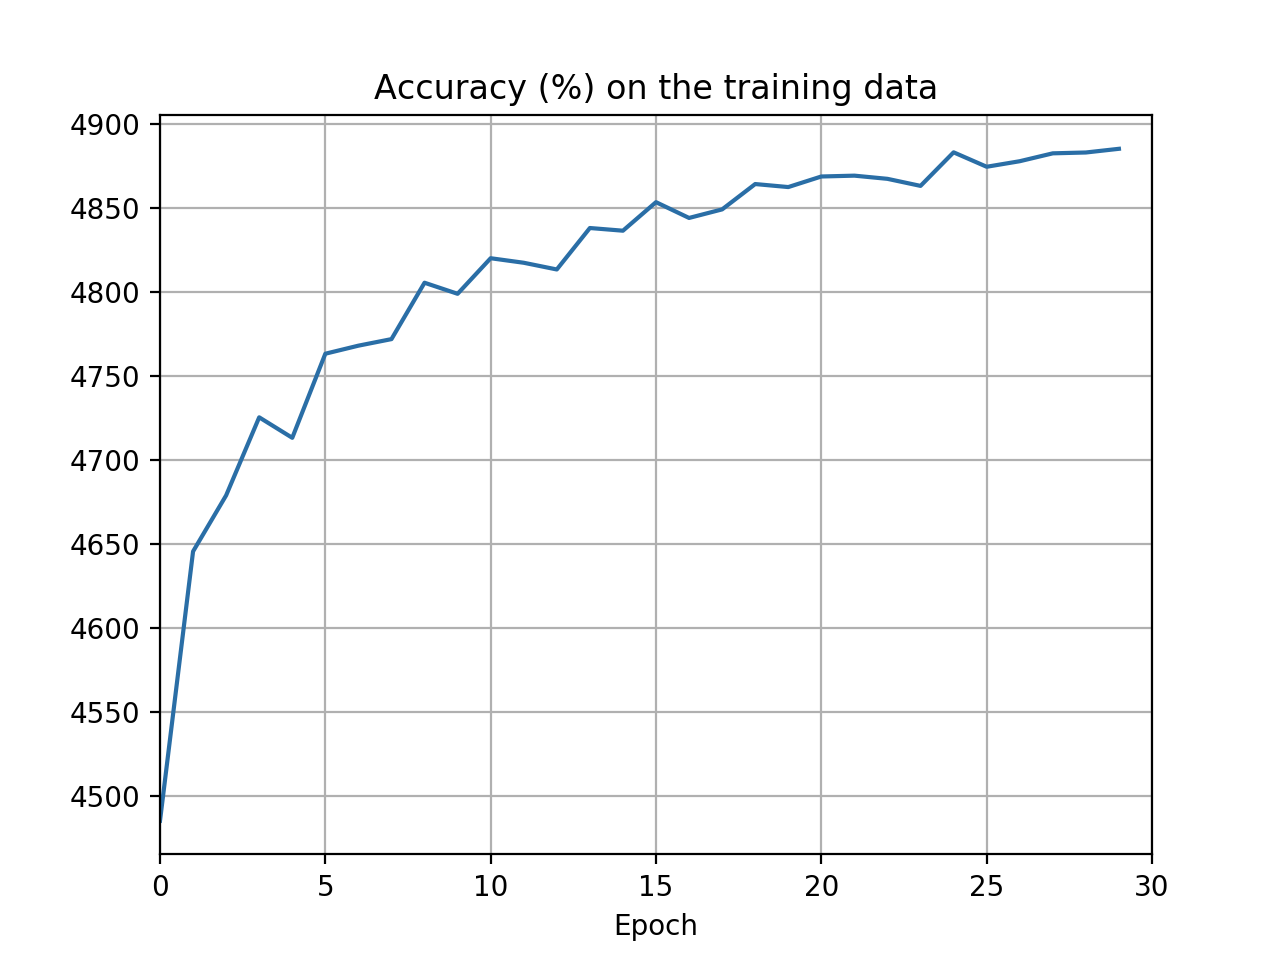

<IPython.core.display.Javascript object>


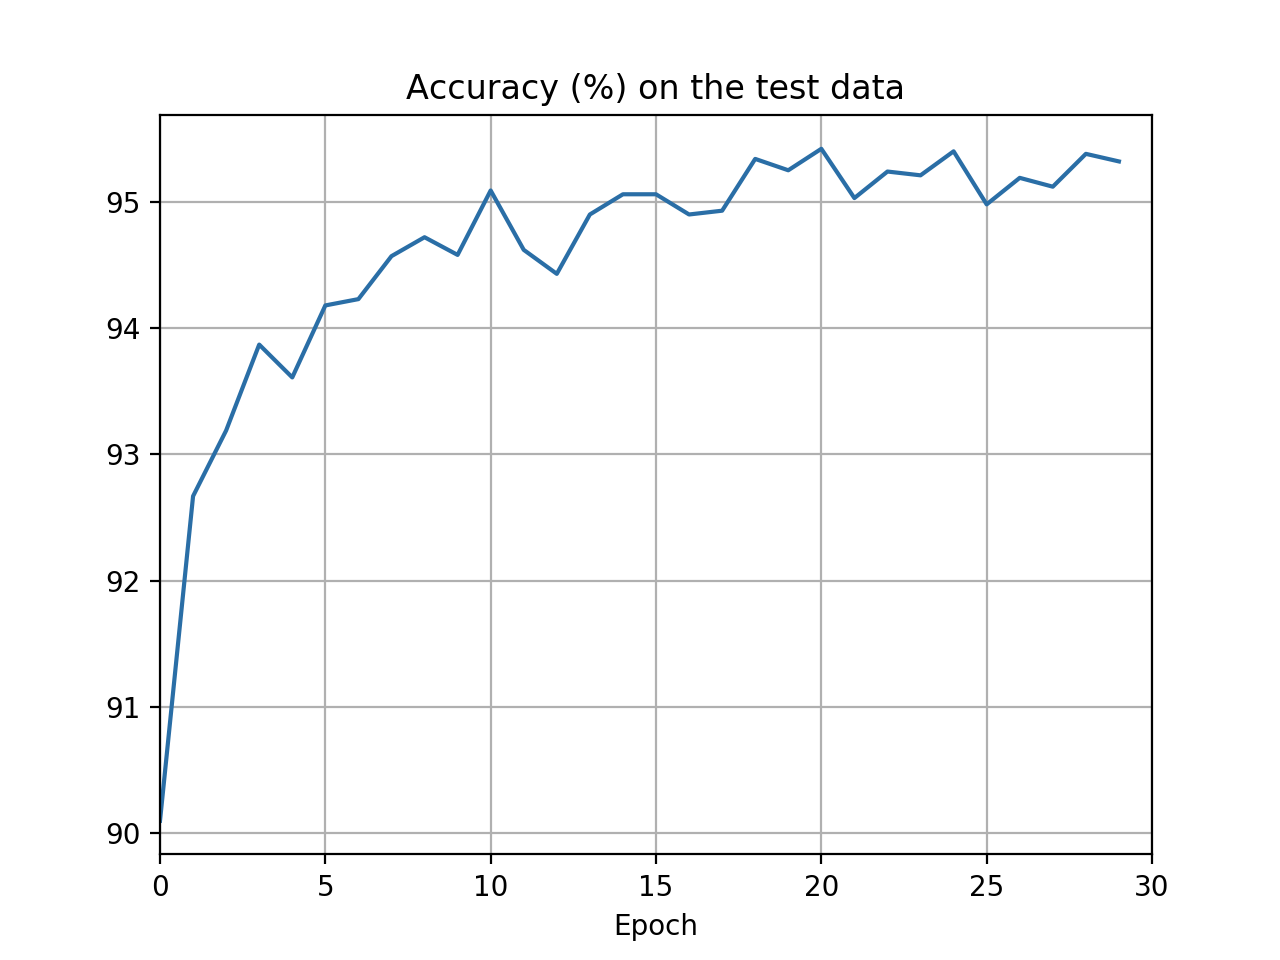

<IPython.core.display.Javascript object>


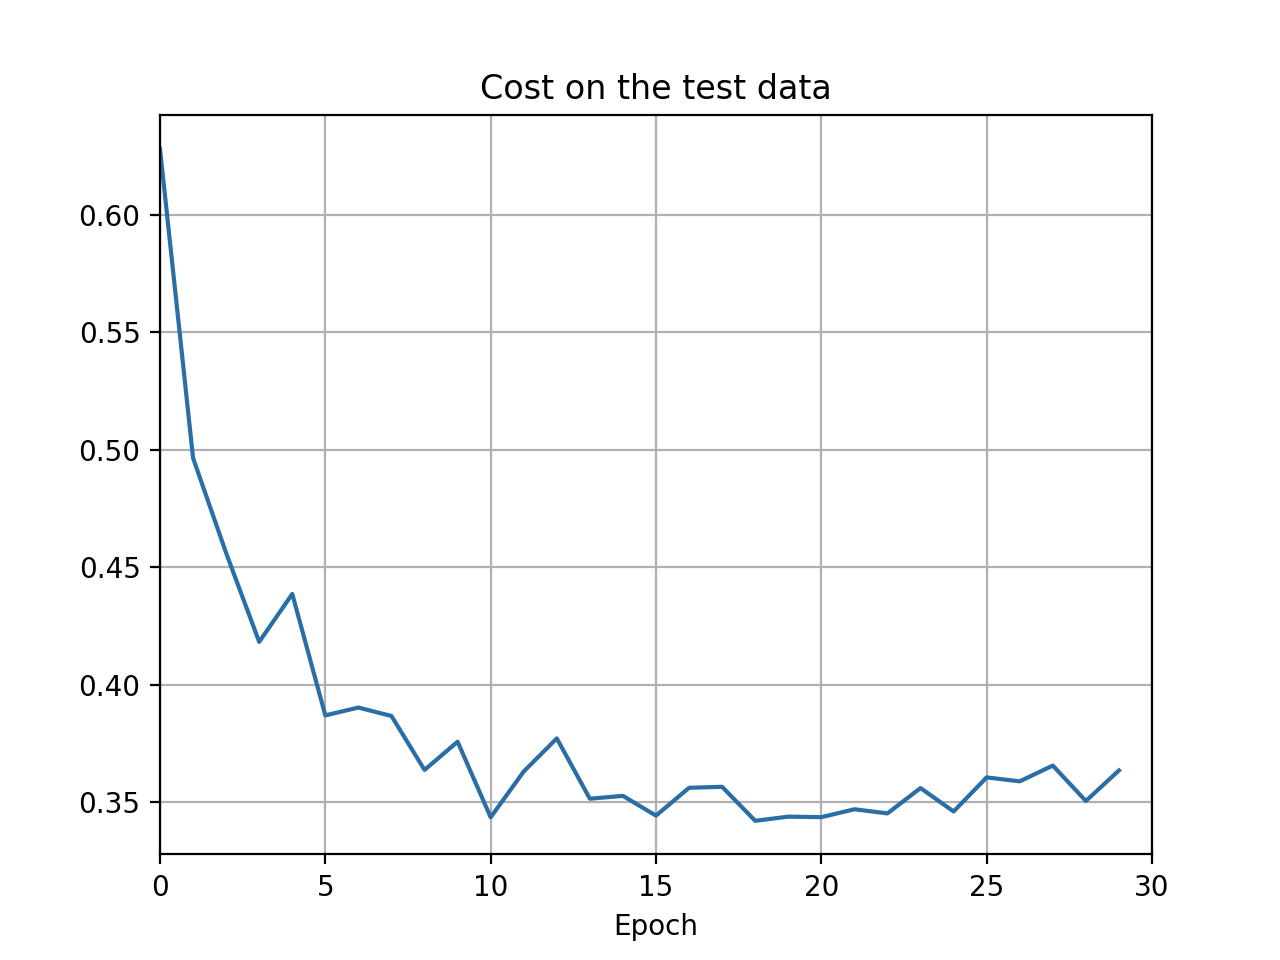

In [40]:
%matplotlib notebook
training_cost_xmin = 0
plot_training_cost(training_cost_2, num_epochs_2, training_cost_xmin)

training_accuracy_xmin = 0
plot_training_accuracy(training_accuracy_2, num_epochs_2, training_accuracy_xmin, training_set_size)

test_accuracy_xmin = 0
plot_test_accuracy(test_accuracy_2, num_epochs_2, test_accuracy_xmin)

test_cost_xmin = 0
plot_test_cost(test_cost_2, num_epochs_2, test_cost_xmin)